In [14]:
from os import listdir
from matplotlib import image
import random
import numpy as np 
from dataclasses import dataclass

# load images in a directory 
random.seed(8)
random_indexes = random.sample(range(25000), 250)
loaded_images = list()
for i in range(250):
	# load image
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('E:/Labs/mirflickr/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

> loaded im7428.jpg (333, 500, 3)
> loaded im12137.jpg (500, 337, 3)
> loaded im12300.jpg (333, 500, 3)
> loaded im4139.jpg (272, 500, 3)
> loaded im6328.jpg (500, 333, 3)
> loaded im23095.jpg (351, 500, 3)
> loaded im1434.jpg (299, 400, 3)
> loaded im2791.jpg (375, 500, 3)
> loaded im4484.jpg (335, 500, 3)
> loaded im8108.jpg (375, 500, 3)
> loaded im16592.jpg (500, 375, 3)
> loaded im6861.jpg (474, 500, 3)
> loaded im13130.jpg (500, 333, 3)
> loaded im21032.jpg (341, 500, 3)
> loaded im992.jpg (372, 500, 3)
> loaded im15044.jpg (375, 500, 3)
> loaded im15971.jpg (375, 500, 3)
> loaded im14848.jpg (408, 500, 3)
> loaded im12795.jpg (375, 500, 3)
> loaded im16219.jpg (350, 500, 3)
> loaded im18780.jpg (258, 500, 3)
> loaded im6299.jpg (333, 500, 3)
> loaded im13195.jpg (500, 500, 3)
> loaded im2934.jpg (500, 292, 3)
> loaded im15895.jpg (323, 500, 3)
> loaded im7673.jpg (500, 500, 3)
> loaded im24871.jpg (498, 500, 3)
> loaded im655.jpg (372, 500, 3)
> loaded im22975.jpg (339, 500, 3)


In [15]:
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
	if (index % 10) == 0:
		print('> processed %i images' % (index))

> processed 10 images
> processed 20 images
> processed 30 images
> processed 40 images
> processed 50 images
> processed 60 images
> processed 70 images
> processed 80 images
> processed 90 images
> processed 100 images
> processed 110 images
> processed 120 images
> processed 130 images
> processed 140 images
> processed 150 images
> processed 160 images
> processed 170 images
> processed 180 images
> processed 190 images
> processed 200 images
> processed 210 images
> processed 220 images
> processed 230 images
> processed 240 images
> processed 250 images


In [16]:
RED = 0
GREEN = 1
BLUE = 2
# Expected value & Variance
#RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red: Expected value - {0:.2f}, Variance - {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green: Expected value - {0:.2f}, Variance - {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue: Expected value - {0:.2f}, Variance - {1:.2f}"\
.format(M_blue, D_blue))

Red: Expected value - 112.49, Variance - 6353.01
Green: Expected value - 104.34, Variance - 5756.84
Blue: Expected value - 93.01, Variance - 5873.88


In [17]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans
        
#Asymmetry and excess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Excess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2)
Excess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2)
Excess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2)
print('Red: Asymmetry - {0:.3f}, Excess - {1:.3f}'\
.format(Asym_red, Excess_red))
print('Green: Asymmetry - {0:.3f}, Excess - {1:.3f}'\
.format(Asym_green, Excess_green))
print('Blue: Asymmetry - {0:.3f}, Excess - {1:.3f}'\
.format(Asym_blue, Excess_blue))

Red: Asymmetry - 0.206, Excess - 1.803
Green: Asymmetry - 0.330, Excess - 1.964
Blue: Asymmetry - 0.549, Excess - 2.135


In [18]:
#3. Gethering info vectors
Vector_A = np.array([np.array([M_red, D_red, Asym_red, Excess_red]),
                     np.array([M_green, D_green, Asym_green, Excess_green]),
                     np.array([M_blue, D_blue, Asym_blue, Excess_blue])])
print("Vector_A:\n" + str(Vector_A))
Vector_All_DATA = np.copy(Vector_A)
itear = 0
for image in loaded_images:
    image = np.reshape(image, (-1, 3))
    image = np.swapaxes(image, 0, 1)
    Vector_All_DATA = np.concatenate((Vector_All_DATA,image),axis=1)
    itear += 1
    if (itear % 10 == 0):
        print(str(itear) + " img")

Vector_A:
[[1.12491758e+02 6.35301040e+03 2.06077204e-01 1.80325517e+00]
 [1.04342507e+02 5.75684362e+03 3.30208537e-01 1.96430324e+00]
 [9.30133830e+01 5.87388153e+03 5.48968596e-01 2.13480087e+00]]
10 img
20 img
30 img
40 img
50 img
60 img
70 img
80 img
90 img
100 img
110 img
120 img
130 img
140 img
150 img
160 img
170 img
180 img
190 img
200 img
210 img
220 img
230 img
240 img
250 img


In [19]:
#4. Gaussian models

#a Expected value
P_x1 = np.random.normal(M_red, D_red, 1)
print("Expected value + colors:\n" + str(P_x1))

#b Expected value and dispersion
P_x2 = np.cov(Vector_All_DATA)
print("Expected value + dispersion + colors:\n" + str(P_x2[:2, :2]))

#c Expected value, dispersion and asymetry
print("Expected value + dispersion + asymetry + colors:\n" + str(P_x2[:3, :3]))

#d Expected value, dispersion, asymetry and excess
print("Expected value + dispersion + asymetry + excess + colors:\n" + str(P_x2[:4, :4]))

Expected value + colors:
[-1941.94084942]
Expected value + dispersion + colors:
[[6353.86906855 5313.95741987]
 [5313.95741987 5757.54808175]]
Expected value + dispersion + asymetry + colors:
[[6353.86906855 5313.95741987 4726.35131306]
 [5313.95741987 5757.54808175 5238.69940006]
 [4726.35131306 5238.69940006 5874.61823923]]
Expected value + dispersion + asymetry + excess + colors:
[[6353.86906855 5313.95741987 4726.35131306]
 [5313.95741987 5757.54808175 5238.69940006]
 [4726.35131306 5238.69940006 5874.61823923]]


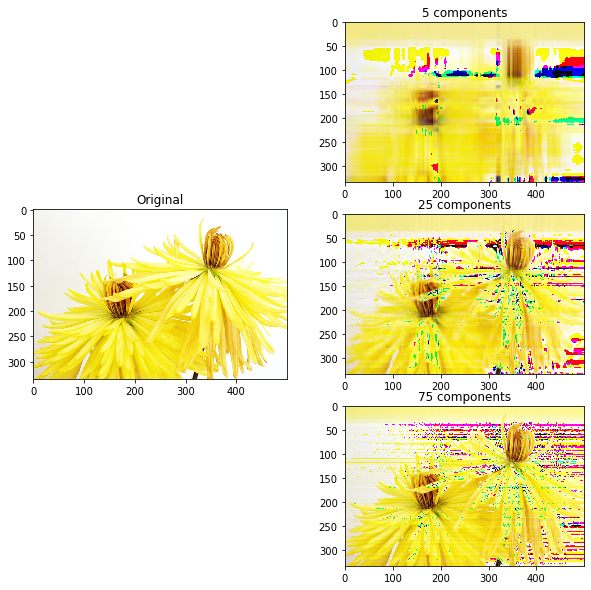

In [20]:
#5. a.Restoring using PCA
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

test_img = loaded_images[68]
a_np = np.array(test_img)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def PCA_2d(image_2d, numpc):
	cov_mat = image_2d - np.mean(image_2d)
	eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))
	p = np.size(eig_vec, axis =1)
	idx = np.argsort(eig_val)
	idx = idx[::-1]
	eig_vec = eig_vec[:,idx]
	eig_val = eig_val[idx]
    
	if numpc <p or numpc >0:
		eig_vec = eig_vec[:, range(numpc)]
	score = np.dot(eig_vec.T, cov_mat)
	recon = np.dot(eig_vec, score) + np.mean(image_2d).T
	recon_img_mat = np.uint8(np.absolute(recon))
	return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 5), PCA_2d(a_g, 5), PCA_2d(a_b, 5)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.title('Original')
plt.imshow(loaded_images[68])
fig.add_subplot(3, 2, 2)
plt.title('5 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 25), PCA_2d(a_g, 25), PCA_2d(a_b, 25)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 4)
plt.title('25 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 75), PCA_2d(a_g, 75), PCA_2d(a_b, 75)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 6)
plt.title('75 components')
plt.imshow(recon_color_img)
plt.show()
# recon_color_img = Image.fromarray(recon_color_img)
# recon_color_img.show()

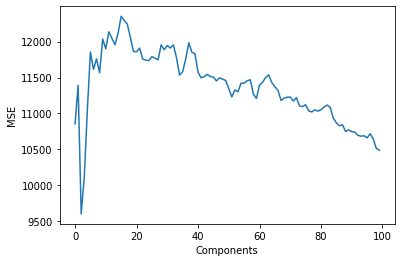

In [21]:
# b.calculating MSE
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

mse_list = list()
for i in range(100):
    a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, i), PCA_2d(a_g, i), PCA_2d(a_b, i)
    recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
    mse_list.append(mse(test_img, recon_color_img))
plt.plot(range(len(mse_list)),mse_list)
plt.xlabel("Components")
plt.ylabel("MSE")
plt.show()

In [22]:
#6 Markov chain:

markov_matrix1 = np.zeros(shape=(256, 256))
#c-type
arr = a_r.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 1st oder:\n", markov_matrix)
print("\nRed matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix1 = np.zeros(shape=(256, 256))
#Fortran-type
arr = a_r.flatten('F')
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 2-nd type 1st oder:\n", markov_matrix)
print("\nRed matrix 2-nd type 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix2 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix2[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix2[0] / sum(markov_matrix2[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix2[i] / sum(markov_matrix2[i])))
print("\n\nGreen matrix 1st oder:\n", markov_matrix)
print("\nGreen matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix3 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix3[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix3[0] / sum(markov_matrix3[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix3[i] / sum(markov_matrix3[i])))
print("\n\nBlue matrix 1st oder:\n", markov_matrix)
print("\nBlue matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

Q:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
Q:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Red matrix 1st oder:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.35390476 0.14847619 0.11695238]
 [0.         0.         0.         ... 0.11130755 0.52022099 0.16876611]
 [0.         0.         0.         ... 0.0448592  0.08222368 0.74881758]]

Red matrix 2nd order:
 [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Red matrix 2-nd type 1st oder:
 [[0.         0.2        0.2        ... 0.         0.         0.        ]
 [0.33333333 0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.35819048 0.13857143 0

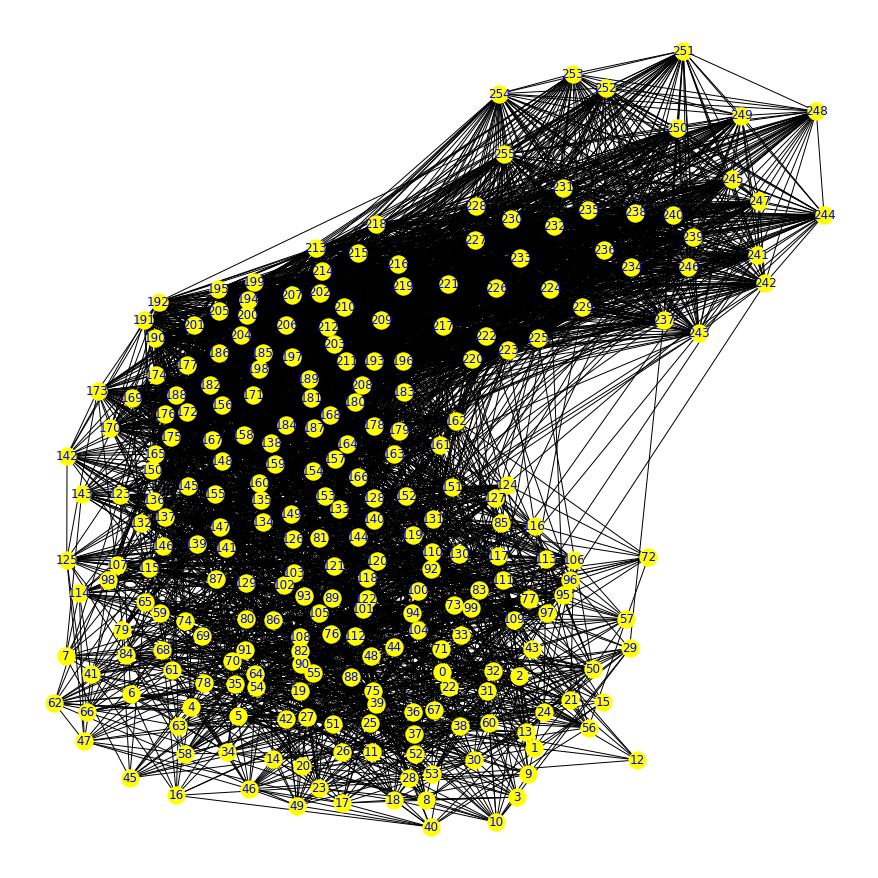

In [23]:
#Graph
import networkx as nx
import pandas as pd

data = markov_matrix
data = np.triu(data) + np.triu(data).T
ind = [str(i) for i in range(data.shape[0])]
df2 = pd.DataFrame(data, index=ind, columns=ind)
plt.figure(1,figsize=(12,12))  
G2 = nx.from_pandas_adjacency(df2)

nx.draw(G2, with_labels=True, node_color='yellow', font_color='blue')
plt.show()

In [24]:
test = pd.DataFrame(markov_matrix)
test

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.030303,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.030303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.083333,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.0,0.0625,0.0,0.0,0.0,0.000000,0.062500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.071429,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.013247,0.013728,0.028420,0.041667,0.115125,0.425819,0.172929,0.058285,0.036127,0.047929
252,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.008552,0.012516,0.017522,0.021694,0.044639,0.124739,0.453692,0.156654,0.062578,0.069879
253,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.005504,0.005837,0.007839,0.009840,0.023015,0.039026,0.107738,0.530687,0.131755,0.106905
254,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,...,0.002157,0.003055,0.004313,0.009166,0.012581,0.026060,0.052301,0.130841,0.493710,0.236520


In [25]:
import quantecon as qe
def regularity_check(matrix):
    counter = 0
    for a in range(1,6):
        matrix = np.linalg.matrix_power(matrix,a)

        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                if matrix[i,j] < 0:
                    counter += 1 
        print('iteration: ' , a, 'negative elements: ' ,counter)
        
regularity_check(markov_matrix)
print('Для 5 ітерації ,виконується умова регулярності.Модель регулярна ')

P = markov_matrix
mc = qe.MarkovChain(P, [str(i) for i in range(0,256)])
print('Модель незворотня -  ', mc.is_irreducible)
print('Рекурентную називають модель M  яка з ймовірністю в P = 1 при покиданні стану вернеться в цей стан за час t < inf,у майбутньму')
print("Кількість рекурентних станів " ,np.shape(mc.recurrent_classes)[1])
if np.shape(mc.recurrent_classes_indices)[1] == 256:
    print('Усі стани моделі рекурентні ,модель рекурентна ')
else :

SyntaxError: unexpected EOF while parsing (<ipython-input-25-c67b94b76c08>, line 23)